C:\Users\PC\AppData\Local\Temp\ipykernel_11488\24018097.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_df['MI Score'], y=mi_df['Feature'], palette="viridis")


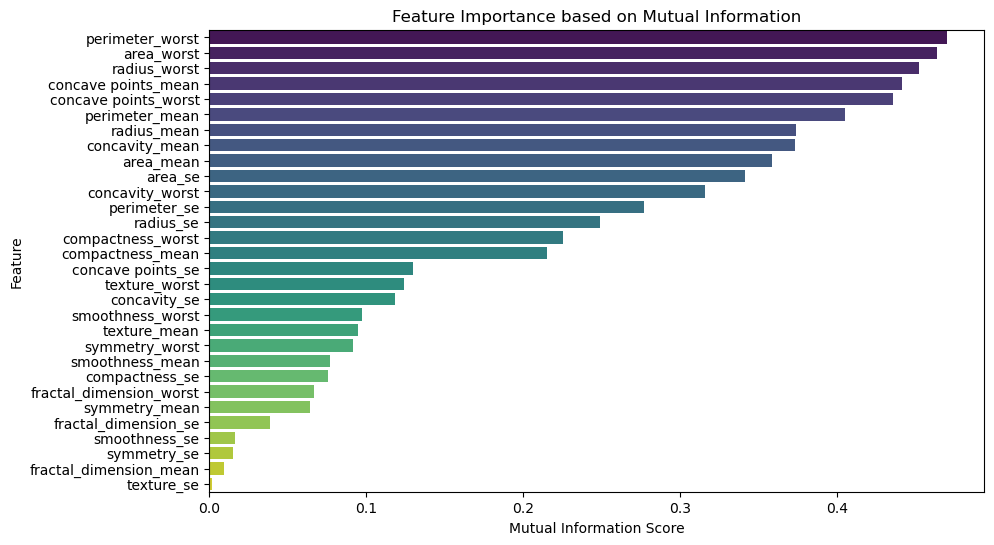

Top Selected Features: ['perimeter_worst', 'area_worst', 'radius_worst', 'concave points_mean', 'concave points_worst', 'perimeter_mean', 'radius_mean', 'concavity_mean', 'area_mean', 'area_se']


C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8424 - loss: 0.5037 - val_accuracy: 0.9649 - val_loss: 0.2650
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9051 - loss: 0.2950 - val_accuracy: 0.9649 - val_loss: 0.1410
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.1913 - val_accuracy: 0.9737 - val_loss: 0.0976
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9310 - loss: 0.1755 - val_accuracy: 0.9649 - val_loss: 0.0812
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9212 - loss: 0.1910 - val_accuracy: 0.9649 - val_loss: 0.0747
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9189 - loss: 0.1663 - val_accuracy: 0.9649 - val_loss: 0.0711
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9295 - loss: 0.1989 - val_accuracy: 0.9649 - val_loss: 0.0697
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9600 - loss: 0.1132 - val_accuracy: 0.9737 - val_los

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Class: Malignant


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("breast-cancer.csv")

# Drop the 'id' column (not useful for training)
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Rename and encode target column ('M' -> 1, 'B' -> 0)
df.rename(columns={'diagnosis': 'target'}, inplace=True)
df['target'] = df['target'].map({'M': 1, 'B': 0})

# Split features and target
X = df.drop(columns=['target'])
y = df['target']

# Compute Mutual Information Scores
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame for feature importance
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_df['MI Score'], y=mi_df['Feature'], palette="viridis")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("Feature Importance based on Mutual Information")
plt.show()

# Select top 10 most important features
selected_features = mi_df['Feature'].head(10).tolist()
print("Top Selected Features:", selected_features)

# Create dataset with selected features
X_selected = df[selected_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=16, verbose=1)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))

# Save the model
model.save("breast_cancer_model.h5")

# Predict for a new sample (Example)
sample = np.expand_dims(X_test[0], axis=0)  # Take one test sample
prediction = model.predict(sample)
print(f"Predicted Class: {'Malignant' if prediction[0][0] < 0.5 else 'Benign'}")


In [7]:
print(X_test[0])
print(y_test[0])

[-0.33393537 -0.35629925 -0.26903951 -0.27623152 -0.19956318 -0.44810956
 -0.47069438 -0.10984741 -0.49199876 -0.22105292]


KeyError: 0